In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [8]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset2/train'
valid_path = 'Dataset2/test'

In [11]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in inception.layers:
    layer.trainable = False

In [17]:
folders = glob('Dataset2/train/*')

In [18]:
folders

['Dataset2/train\\Healthy', 'Dataset2/train\\Powdery', 'Dataset2/train\\Rust']

In [19]:
x = Flatten()(inception.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

In [21]:
model = Model(inputs=inception.input, outputs=prediction)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('Dataset2/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1206 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('Dataset2/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 81 images belonging to 3 classes.


In [28]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ABHISHEK\AppData\Local\Temp/ipykernel_17316/4039646700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
38/38 [==============================] - 201s 5s/step - loss: 2.9783 - accuracy: 0.7272 - val_loss: 0.3032 - val_accuracy: 0.9630
Epoch 2/20
38/38 [==============================] - 179s 5s/step - loss: 0.5022 - accuracy: 0.9270 - val_loss: 0.1415 - val_accuracy: 0.9506
Epoch 3/20
38/38 [==============================] - 180s 5s/step - loss: 0.2833 - accuracy: 0.9527 - val_loss: 0.2196 - val_accuracy: 0.9630
Epoch 4/20
38/38 [==============================] - 178s 5s/step - loss: 0.2228 - accuracy: 0.9527 - val_loss: 0.0482 - val_accuracy: 0.9753
Epoch 5/20
38/38 [==============================] - 181s 5s/step - loss: 0.1348 - accuracy: 0.9668 - val_loss: 0.1008 - val_accuracy: 0.9753
Epoch 6/20
38/38 [==============================] - 183s 5s/step - loss: 0.1839 - accuracy: 0.9585 - val_loss: 0.0631 - val_accuracy: 0.9753
Epoch 7/20
38/38 [==============================] - 235s 6s/step - loss: 0.1619 - accuracy: 0.9627 - val_loss: 0.4818 - val_accuracy: 0.9506
Epoch 8/20
38

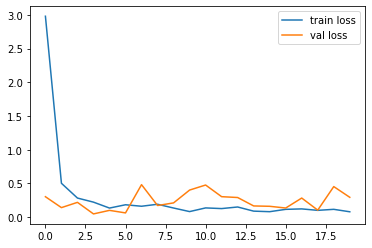

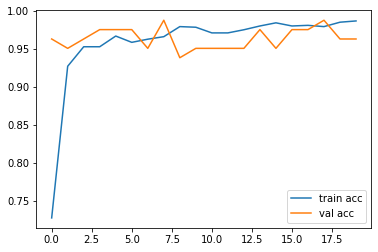

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [32]:
y_pred = model.predict(test_set)

In [33]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.7772316e-21, 1.0000000e+00, 2.9979818e-21],
       [1.7951285e-35, 1.0000000e+00, 3.5563264e-34],
       [4.0672954e-35, 1.0000000e+00, 7.0452397e-27],
       [1.0000000e+00, 6.6821561e-15, 5.8706074e-12],
       [1.0000000e+00, 3.0086249e-21, 1.3620421e-18],
       [6.9798084e-08, 9.9999988e-01, 7.6516837e-18],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.8661044e-20, 2.1647079e-15, 1.0000000e+00],
       [1.0000000e+00, 8.9048097e-16, 3.6086568e-17],
       [4.7243425e-08, 1.0000000e+00, 3.0771311e-13],
       [9.9999988e-01, 6.7194357e-08, 3.2009311e-09],
       [1.0000000e+00, 2.8466991e-18, 3.1608371e-15],
       [4.8471360e-23, 4.0333699e-18, 1.0000000e+00],
       [0.0000000e+00, 3.1057556e-26, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 3.5381434e-32],
       [6.3324534e-23, 3.6370361e-06, 9.9999630e-01],
       [9.9999738e-01, 2.5870709e-06, 2.3346528e-08],
       [1.0000000e+00, 1.562

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1], dtype=int64)